# Import Dataset

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")
# !ls "/content/drive/My Drive/Dataset"

# Splitting Dataset

In [ ]:
import os
base_dir = "./Dataset"
folder_names = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]

# Directory with training cat/dog pictures
dataset_dir = []
for folder in folder_names:
    dataset_dir.append(os.path.join(base_dir, folder))

In [3]:
import os
import shutil
import random

def split_dataset(input_dir, output_dir, train_split=0.7, val_split=0.3):
    # Membuat direktori untuk set train dan val
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Membuat direktori untuk setiap kategori
    for category in folder_names:
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(val_dir, category), exist_ok=True)

        # Mendapatkan daftar nama file dalam setiap kategori
        category_dir = os.path.join(input_dir, category)
        files = os.listdir(category_dir)
        random.shuffle(files)

        # Menghitung jumlah file untuk set train dan val
        num_train = int(len(files) * train_split)
        num_val = len(files) - num_train

        # Memindahkan file ke set train dan val
        for file in files[:num_train]:
            src = os.path.join(category_dir, file)
            dst = os.path.join(train_dir, category, file)
            shutil.copy(src, dst)
        for file in files[num_train:]:
            src = os.path.join(category_dir, file)
            dst = os.path.join(val_dir, category, file)
            shutil.copy(src, dst)

# Contoh penggunaan
input_dir = './Dataset' 
output_dir = './SplitDataset'
os.makedirs(output_dir, exist_ok=True)
split_dataset(input_dir, output_dir)

In [4]:
# Cek jumlah split untuk Astricitoma pada folder train dan val dan bandingkan dngan folder awal
normal_path = "./Dataset/_NORMAL T1"
train_path  = "./SplitDataset/train/_NORMAL T1"
val_path    = "./SplitDataset/val/_NORMAL T1"

print(f"Banyak Data Normal : {len(os.listdir(normal_path))}")
print(f"Banyak Data Train  : {len(os.listdir(train_path))}")
print(f"Banyak Data Val    : {len(os.listdir(val_path))}")

Banyak Data Normal : 251
Banyak Data Train  : 245
Banyak Data Val    : 167


# Image Augmentation

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

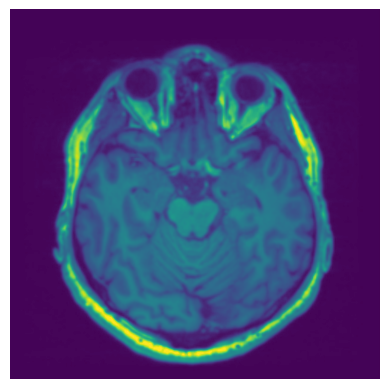

In [6]:
# Open the image file
image = Image.open('./SplitDataset/train/_NORMAL T1/0a0bc6879f5d5d14c4df229b64b801_big_gallery.jpeg')

# Convert the image to a NumPy array
image_np = np.array(image)

# Membuat gambar menggunakan Matplotlib
plt.figure()
plt.imshow(image_np)
plt.axis('off')
plt.show()

## Translasi

In [7]:
# B[x] = A[x + m]
#  [y]    [y + n]

def translate_image(image, m, n):
    # Mengambil dimensi gambar
    height, width = image.shape
    
    # Membuat gambar baru untuk menyimpan hasil translasi
    translated_image = np.zeros_like(image)
    
    # Melakukan iterasi untuk setiap piksel pada gambar asli
    for x in range(height):
        for y in range(width):
            # Menghitung koordinat baru setelah translasi
            new_x = x + m
            new_y = y + n
            
            # Memastikan koordinat baru berada dalam batas gambar
            if 0 <= new_x < height and 0 <= new_y < width:
                # Mengisi piksel pada posisi baru dengan nilai dari piksel asli
                translated_image[new_x, new_y] = image[x, y]
    
    return translated_image

## Shear

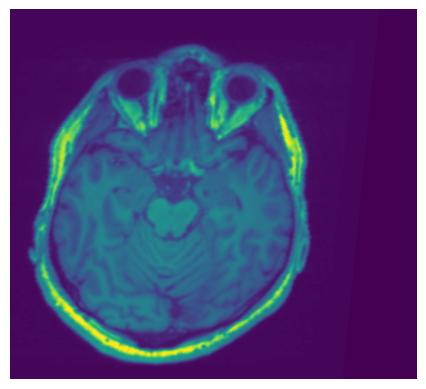

In [28]:
import numpy as np

def shear_image(image, shear_factor):
    # Get image dimensions
    height, width = image.shape
    
    # Calculate the sheared width
    sheared_width = int(width + abs(shear_factor) * height)
    
    # Create a new image to store the sheared result
    sheared_image = np.zeros((height, sheared_width), dtype=image.dtype)
    
    # Perform shear transformation
    for x in range(height):
        for y in range(width):
            # Calculate sheared coordinates
            sheared_x = x
            sheared_y = int(y + shear_factor * x)
            
            # Ensure new coordinates are within bounds
            if 0 <= sheared_x < height and 0 <= sheared_y < sheared_width:
                # Assign pixel value from original image to sheared image
                sheared_image[sheared_x, sheared_y] = image[x, y]
    
    return sheared_image

sheared_image = shear_image(image_np, -0.1)

plt.figure()
plt.imshow(sheared_image)
plt.axis('off')
plt.show()

## Scaling

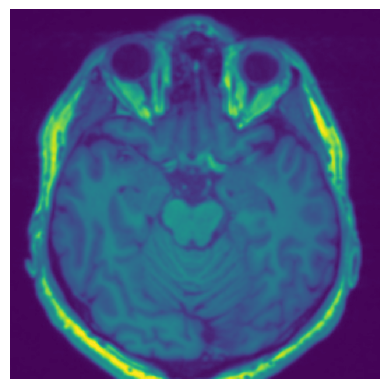

In [48]:
import numpy as np

def scale_image(image, sx, sy):
    # Mengambil dimensi gambar asli
    height, width = image.shape
    
    # Menghitung dimensi gambar hasil penskalaan
    new_height = int(height * sy)
    new_width = int(width * sx)
    
    # Membuat gambar baru untuk menyimpan hasil penskalaan
    scaled_image = np.zeros((new_height, new_width), dtype=np.uint8)
    
    # Melakukan iterasi untuk setiap piksel pada gambar hasil penskalaan
    for x in range(new_height):
        for y in range(new_width):
            # Menghitung koordinat piksel pada gambar asli yang sesuai
            original_x = int(x / sy)
            original_y = int(y / sx)
            
            # Memastikan koordinat piksel asli berada dalam batas gambar
            if 0 <= original_x < height and 0 <= original_y < width:
                # Mengisi piksel pada gambar hasil penskalaan dengan nilai dari piksel asli
                scaled_image[x, y] = image[original_x, original_y]
    
    # Menentukan area yang akan dipotong dari gambar hasil penskalaan agar berada di tengah
    start_x = int((new_height - height) / 2)
    end_x = start_x + height
    start_y = int((new_width - width) / 2)
    end_y = start_y + width
    
    # Memotong gambar hasil penskalaan agar berada di tengah
    cropped_image = scaled_image[start_x:end_x, start_y:end_y]
    
    return cropped_image

cropped_image = scale_image(image_np, 1.2, 1.2)

plt.figure()
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

## Rotation

In [8]:
import numpy as np

def rotate_image(image, angle):
    # Mengambil dimensi gambar
    height, width = image.shape
    
    # Menghitung pusat rotasi
    center_x = width / 2
    center_y = height / 2
    
    # Mengonversi sudut rotasi dari derajat ke radian
    theta = np.radians(angle)
    
    # Menghitung matriks rotasi
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta],
                                [sin_theta, cos_theta]])
    
    # Membuat gambar baru untuk menyimpan hasil rotasi
    rotated_image = np.zeros((height, width), dtype=np.uint8)
    
    # Melakukan iterasi untuk setiap piksel pada gambar asli
    for x in range(height):
        for y in range(width):
            # Menghitung koordinat baru setelah rotasi
            new_x = int(center_x + (x - center_x) * cos_theta - (y - center_y) * sin_theta)
            new_y = int(center_y + (x - center_x) * sin_theta + (y - center_y) * cos_theta)
            
            # Memastikan koordinat baru berada dalam batas gambar
            if 0 <= new_x < height and 0 <= new_y < width:
                # Mengisi piksel pada posisi baru dengan nilai dari piksel asli
                rotated_image[new_x, new_y] = image[x, y]
    
    return rotated_image

## Flipping

In [9]:
# B[x] =  = A[N - x]
#  [y]       [y]
def vertical_flip(image):
    # Membalikkan gambar secara vertikal dengan operasi matriks
    height = image.shape[0]
    flipped_image = image.copy()  # Membuat salinan gambar untuk hasil flipping
    flipped_image[:, :] = image[height - 1::-1, :]  # Melakukan flipping secara vertikal
    return flipped_image

# B[x] = A[x]
#  [y]    [M - y]
def horizontal_flip(image):
    # Membalikkan gambar secara vertikal dengan operasi matriks
    width = image.shape[1]
    flipped_image = image.copy()  # Membuat salinan gambar untuk hasil flipping
    flipped_image[:, :] = image[:, width - 1::-1]  # Melakukan flipping secara vertikal
    return flipped_image


# Modelling

In [10]:
def create_model():

    model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='softmax')
    ])

    model.compile(optimizer=RMSprop(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy']
    )

    return model